In [1]:
import cv2
import os
import pandas as pd
import numpy as np


import math

In [2]:
images = "images"



In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

resimler = len(os.listdir(images))

print(resimler)


30


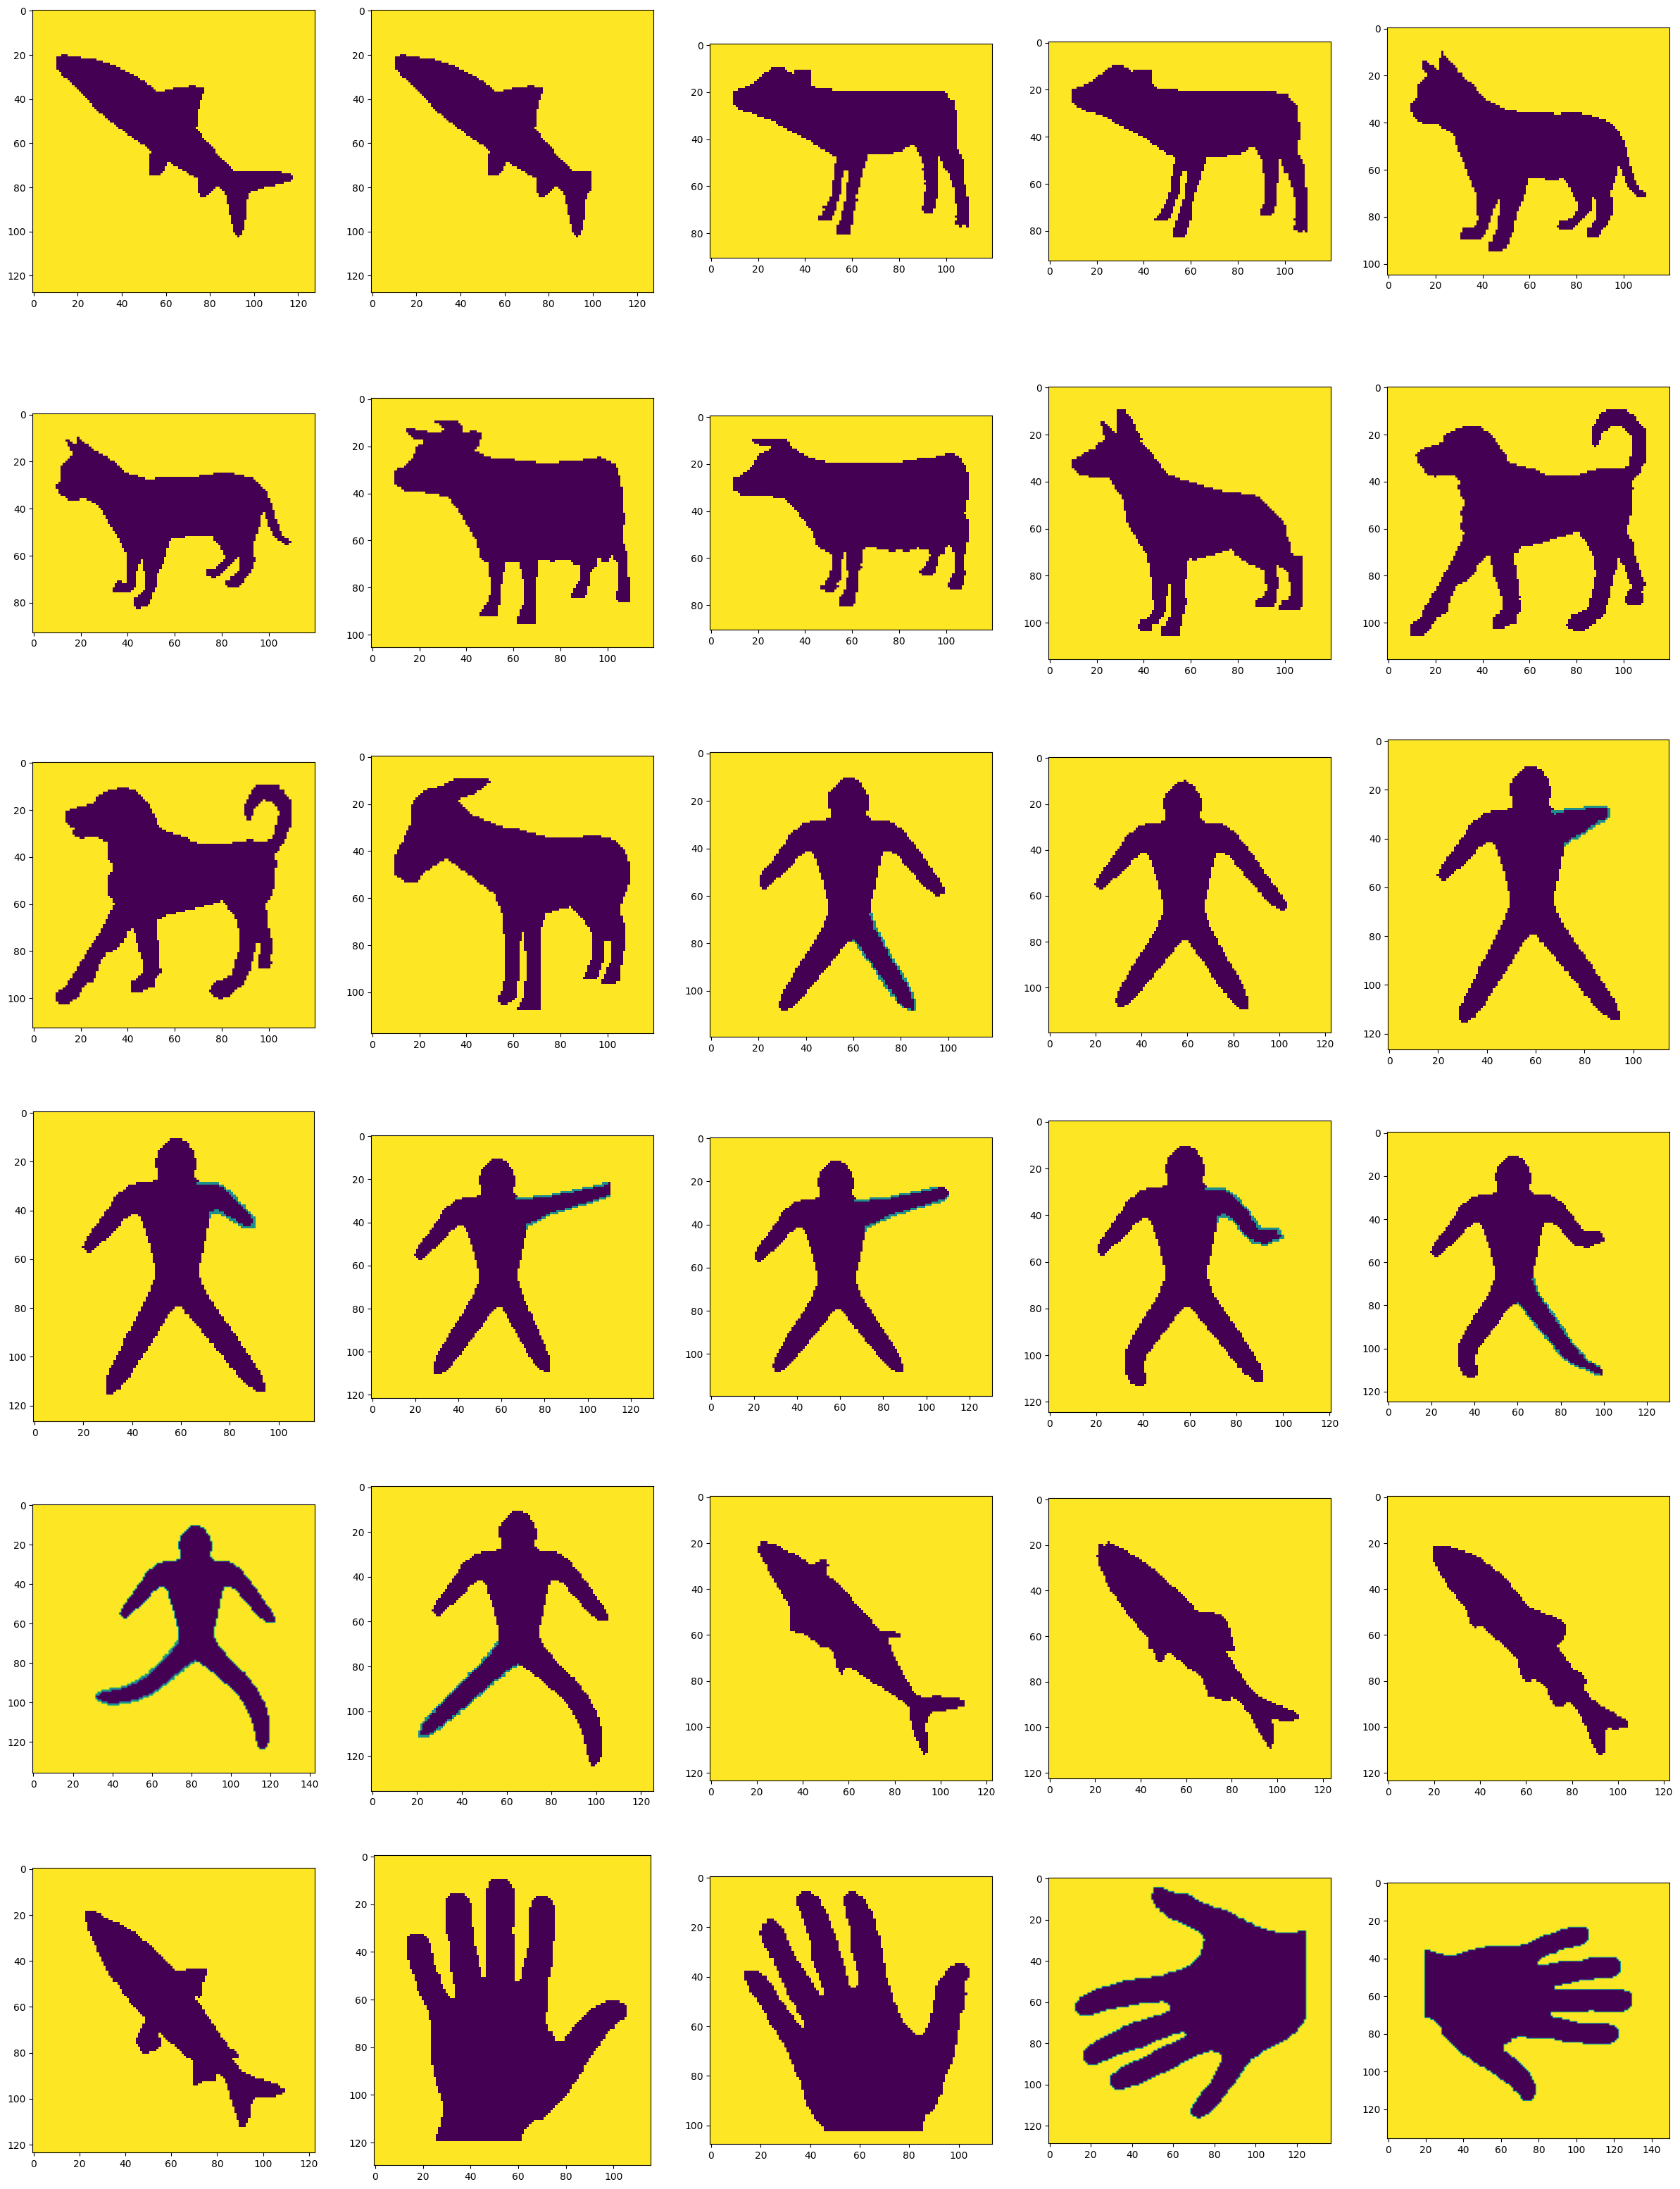

In [4]:
len(os.listdir(images))
plt.figure(figsize = (30,40))
#images icindeki tum resimleri oku

for i in range (len(os.listdir(images))):
    img = mpimg.imread(os.path.join(images, os.listdir(images)[i]))

    # 6 satir 5 sutunluk bir figuru olustur

    plt.subplot(math.ceil(resimler/5),5,i+1)

    #resimleri goster

    plt.imshow(img)
    
#save
plt.savefig("images.png")


In [5]:
# Create an empty dataframe to store the results
df = pd.DataFrame(columns=["Image"])


# Set the directory path
image_path = "images"

In [6]:
def calculate_shape_metrics(image_path):
    

    image = cv2.imread(image_path + "/" + file)
   
   # Resmi siyah beyaz yap
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Kenarlar
    edges = cv2.Canny(gray, -1,1)
    #edges = cv2.Canny(gray, 100, 200)

    #fotoğraftaki değerler sadece 0 ve 255 olduğu için threshold değerleri ölçüm sonuçlarını değiştirmiyor
    
    # Konturlar
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # En büyük kontur
    cnt = max(contours, key=cv2.contourArea)
    
    # Elipslik
    ellipse = cv2.fitEllipse(cnt)
    (ax1, ax2) = ellipse[1]
    ellipticity = max(ax1, ax2) / min(ax1, ax2)
    
    # Uzunluk
    rect = cv2.minAreaRect(cnt)
    (width, height) = rect[1]
    elongation = max(width, height) / min(width, height)
    
    # Dairesellik
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * (area / (perimeter ** 2))
    
    # Dışbükeylik ve Doluluk
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    hull_perimeter = cv2.arcLength(hull, True)
    convexity = hull_perimeter / perimeter
    solidity = area / hull_area
    
    # Dikdörtgensellik
    rect_area = width * height
    rectangularity = area / rect_area
    
    metrics = {
        "Ellipticity": ellipticity,
        "Elongation": elongation,
        "Circularity": circularity,
        "Convexity": convexity,
        "Solidity": solidity,
        "Rectangularity": rectangularity
    }
    
    return metrics

In [7]:

# Calculate the shape metrics for each image

for file in os.listdir(image_path):
    if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
        metrics = calculate_shape_metrics(image_path)
        # Append the results to the dataframe concat method
        df = pd.concat([df, pd.DataFrame({
            "Image": file,
            "Ellipticity": metrics["Ellipticity"],
            "Elongation": metrics["Elongation"],
            "Circularity": metrics["Circularity"],
            "Convexity": metrics["Convexity"],
            "Solidity": metrics["Solidity"],
            "Rectangularity": metrics["Rectangularity"]
        }, index=[0])], ignore_index=True)

In [8]:

df

,Image,Ellipticity,Elongation,Circularity,Convexity,Solidity,Rectangularity
0,bonefishes.png,3.214073,2.595313,0.262400,0.822344,0.618271,0.471935
1,bonefishesocc1.png,3.053884,2.629644,0.304471,0.846429,0.693145,0.455814
2,calf1.png,2.163262,2.355072,0.002724,0.693519,0.008633,0.006689
3,calf2.png,1.570184,1.619048,0.000604,0.454912,0.003698,0.002819
4,cat1.png,1.787077,1.104823,0.001259,0.493150,0.006635,0.004608
5,cat2.png,1.959135,2.319773,0.002425,0.453639,0.017268,0.012753
6,cow1.png,1.376072,1.417772,0.216573,0.628003,0.643752,0.476542
7,cow2.png,1.851455,2.891975,0.003882,0.628193,0.016103,0.013559
8,dog1.png,1.737600,1.537733,0.001031,0.450637,0.007044,0.004905
9,dog2.png,1.123629,1.041667,0.125304,0.541575,0.499769,0.451198


In [9]:
# Save the dataframe to a CSV file
df.to_csv("features.csv", index=False)



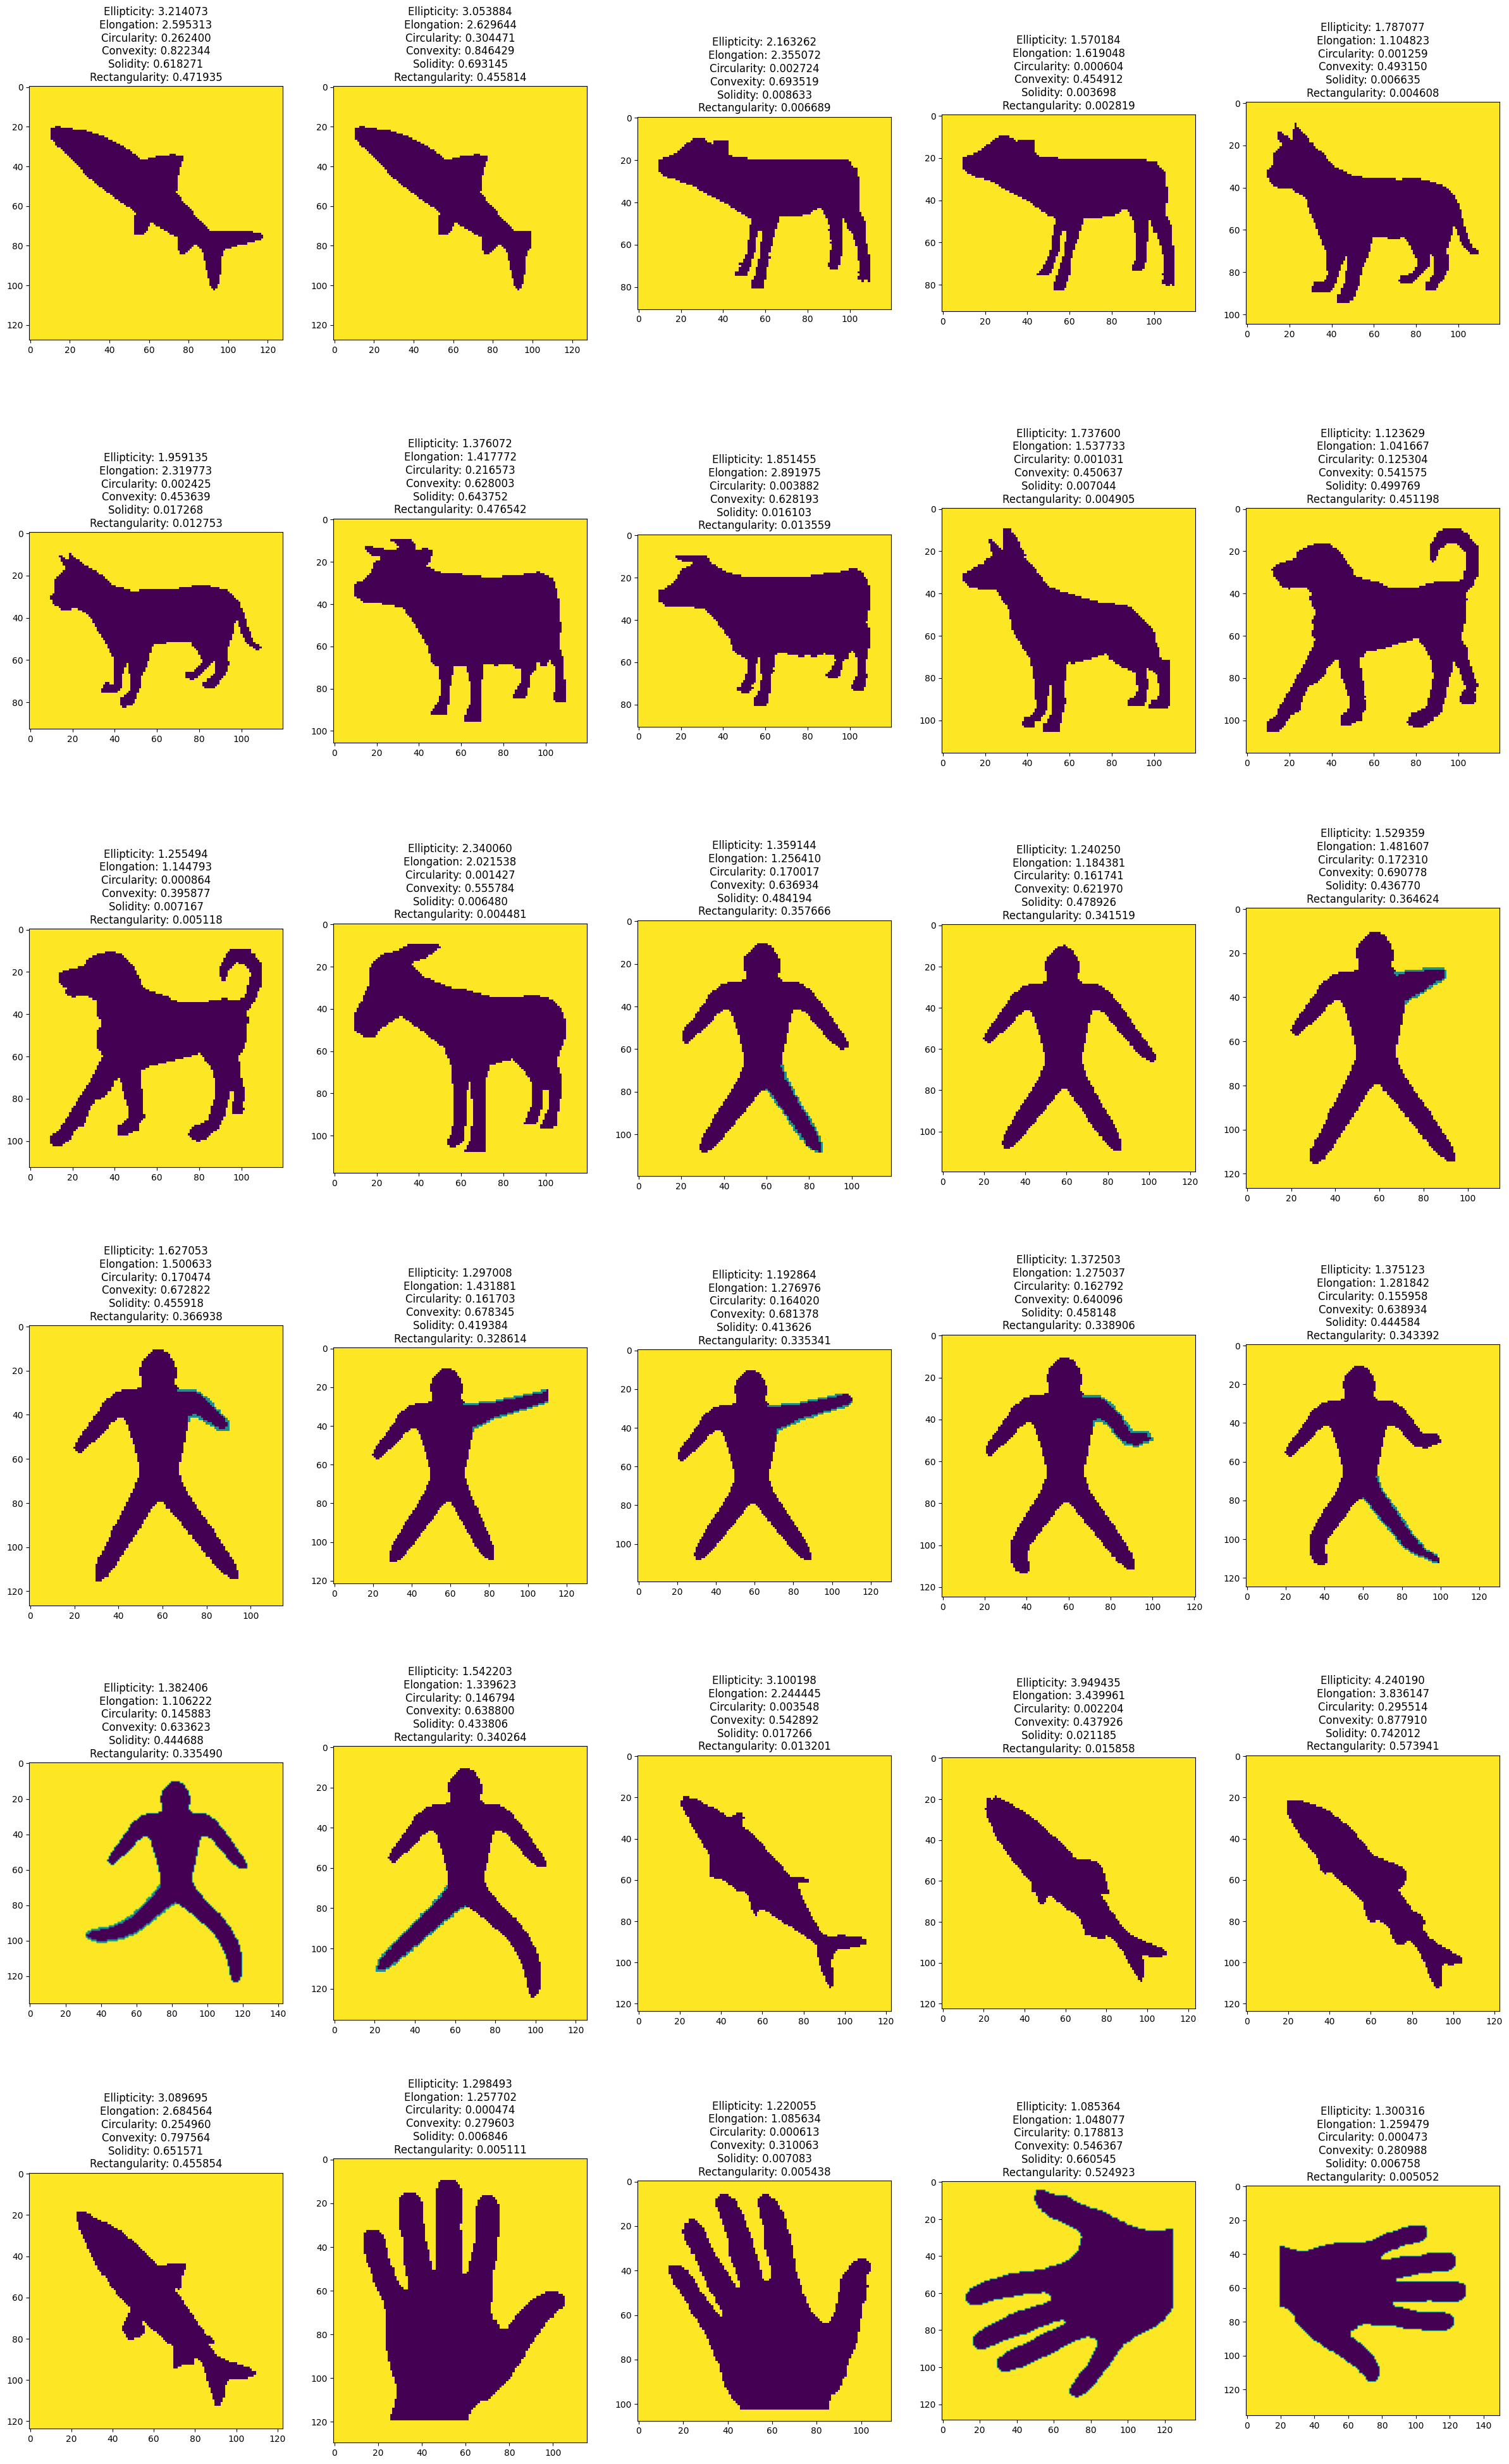

In [12]:


# Tüm metriklerin bir arada gösterilmesi

plt.figure(figsize=(30, 50))

for i in range(len(os.listdir(image_path))):

    img = mpimg.imread(os.path.join(image_path, os.listdir(image_path)[i]))

    plt.subplot(math.ceil(resimler/5), 5, i + 1)
    plt.imshow(img)

    plt.title(
        f"Ellipticity: {df['Ellipticity'][i]:.6f}\n"
        f"Elongation: {df['Elongation'][i]:.6f}\n"
        f"Circularity: {df['Circularity'][i]:.6f}\n"
        f"Convexity: {df['Convexity'][i]:.6f}\n"
        f"Solidity: {df['Solidity'][i]:.6f}\n"
        f"Rectangularity: {df['Rectangularity'][i]:.6f}"
    )

plt.savefig("feature_all.png")


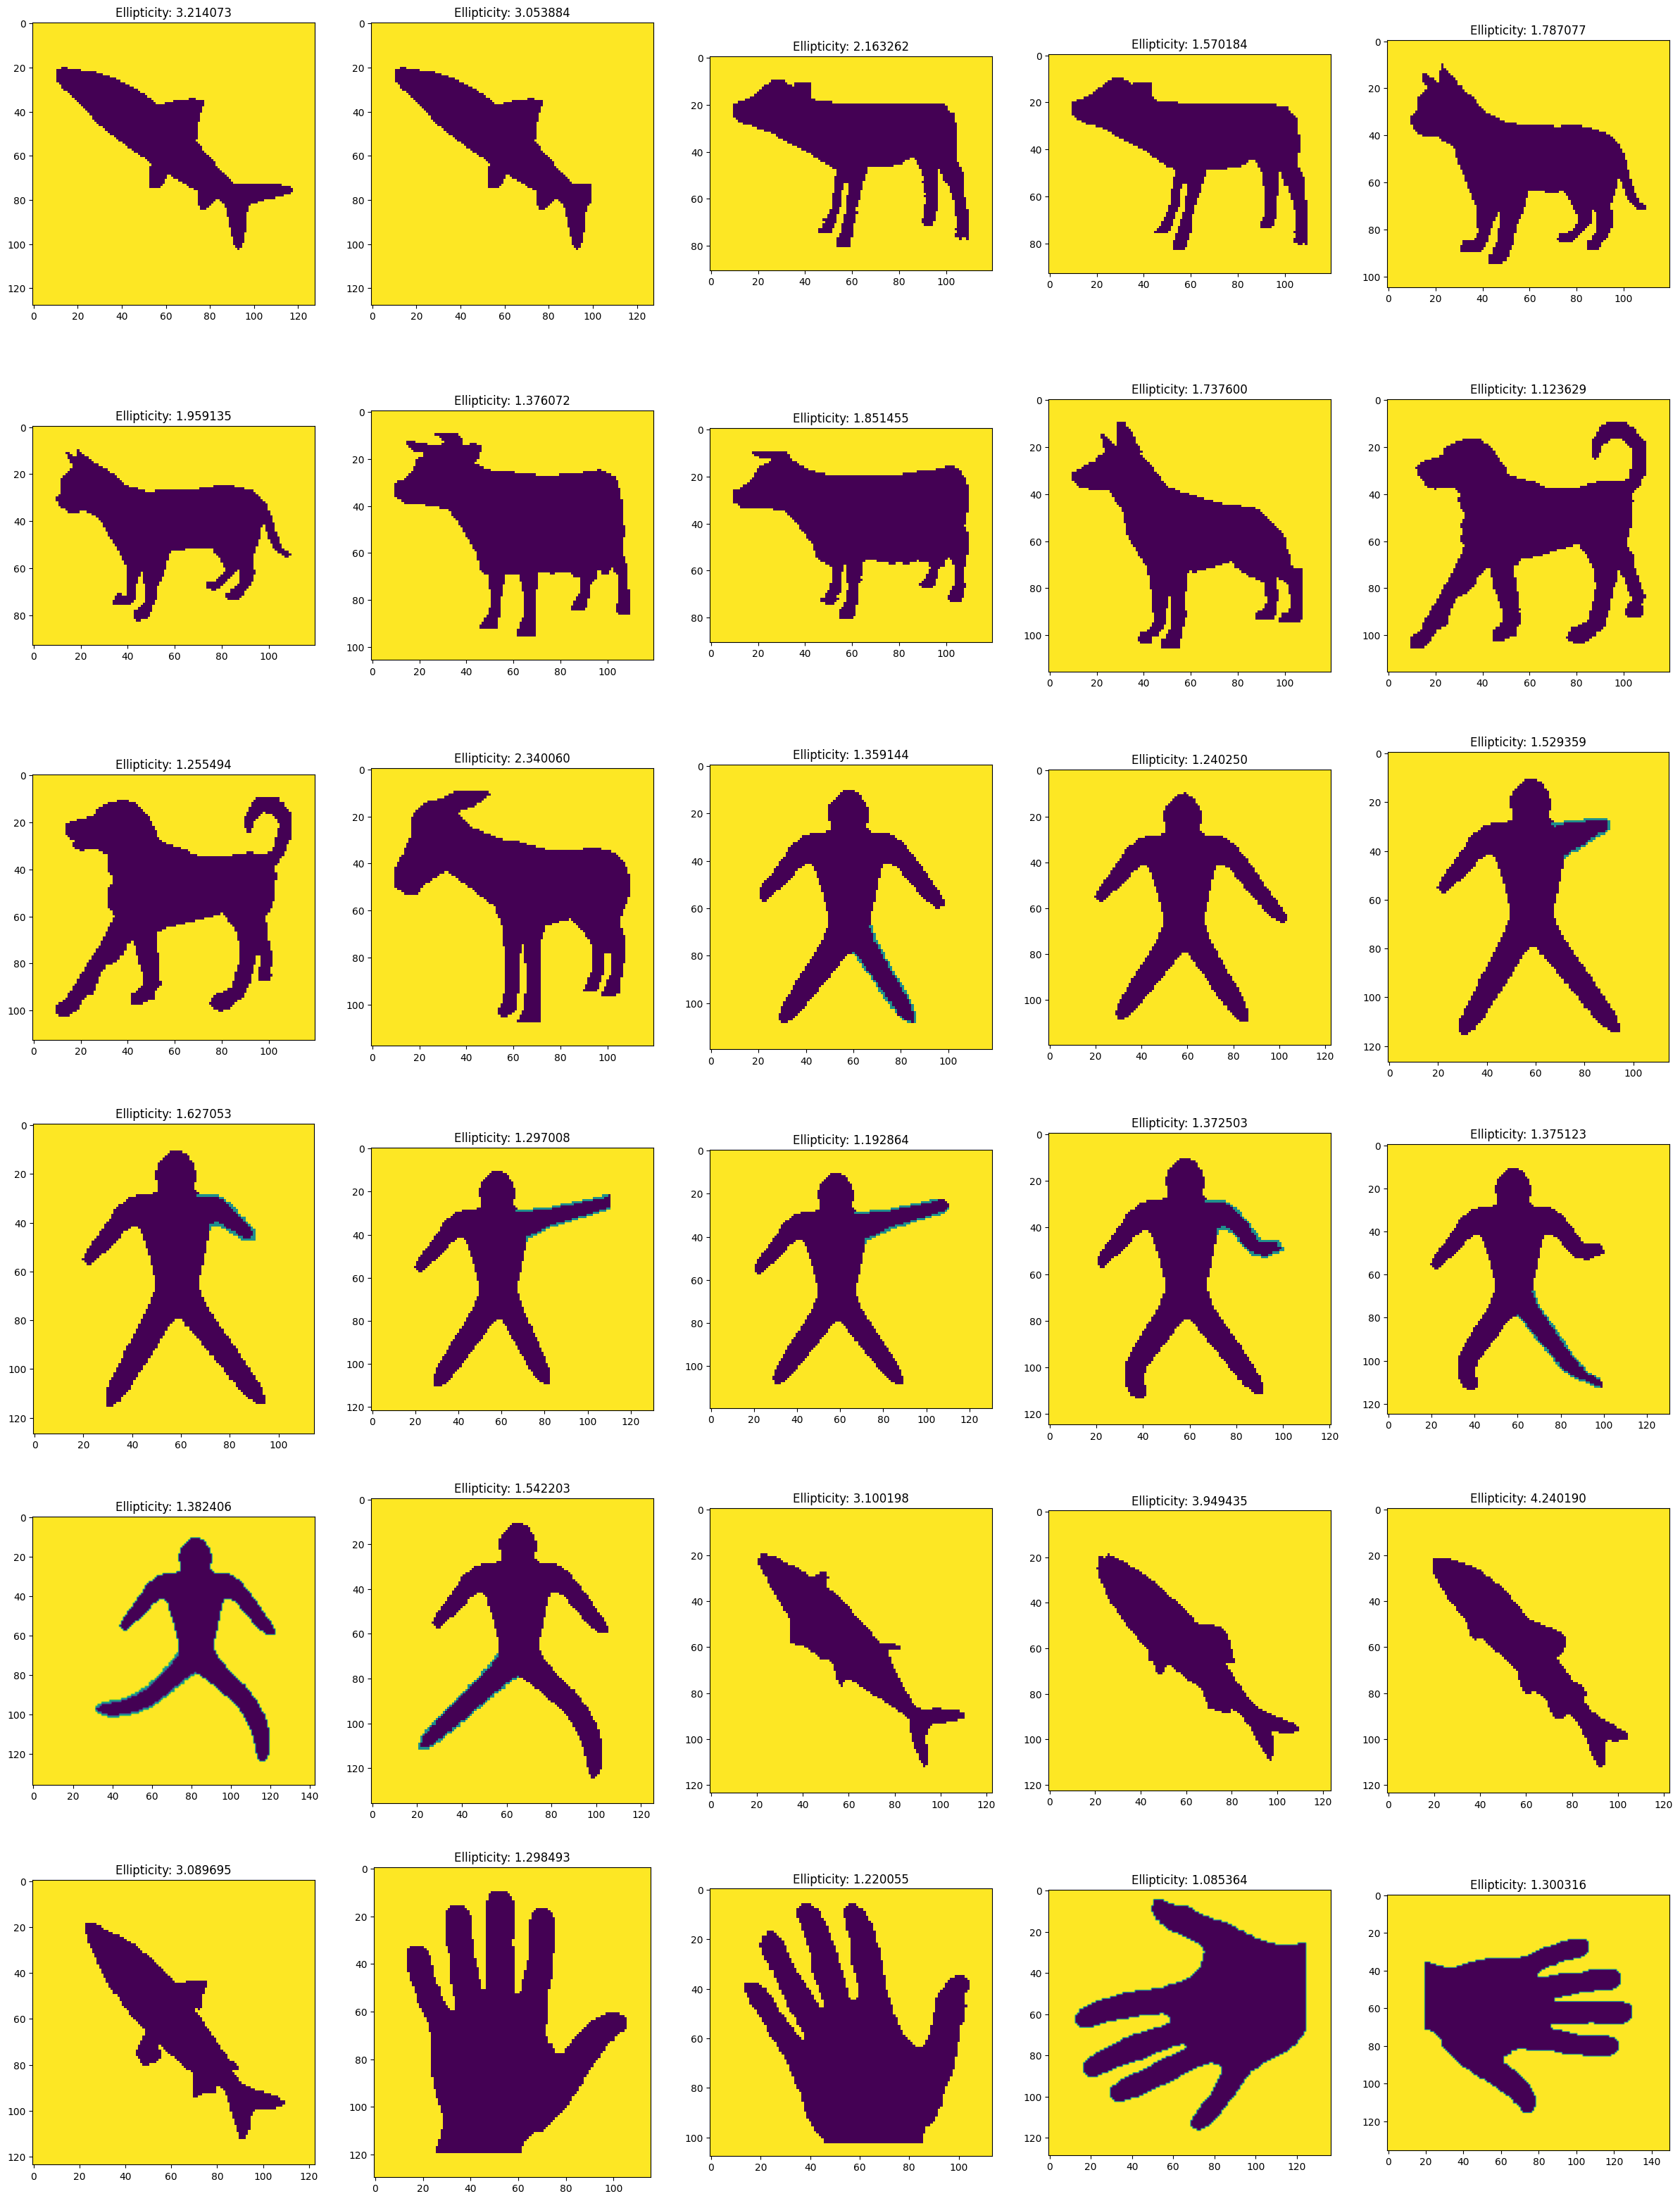

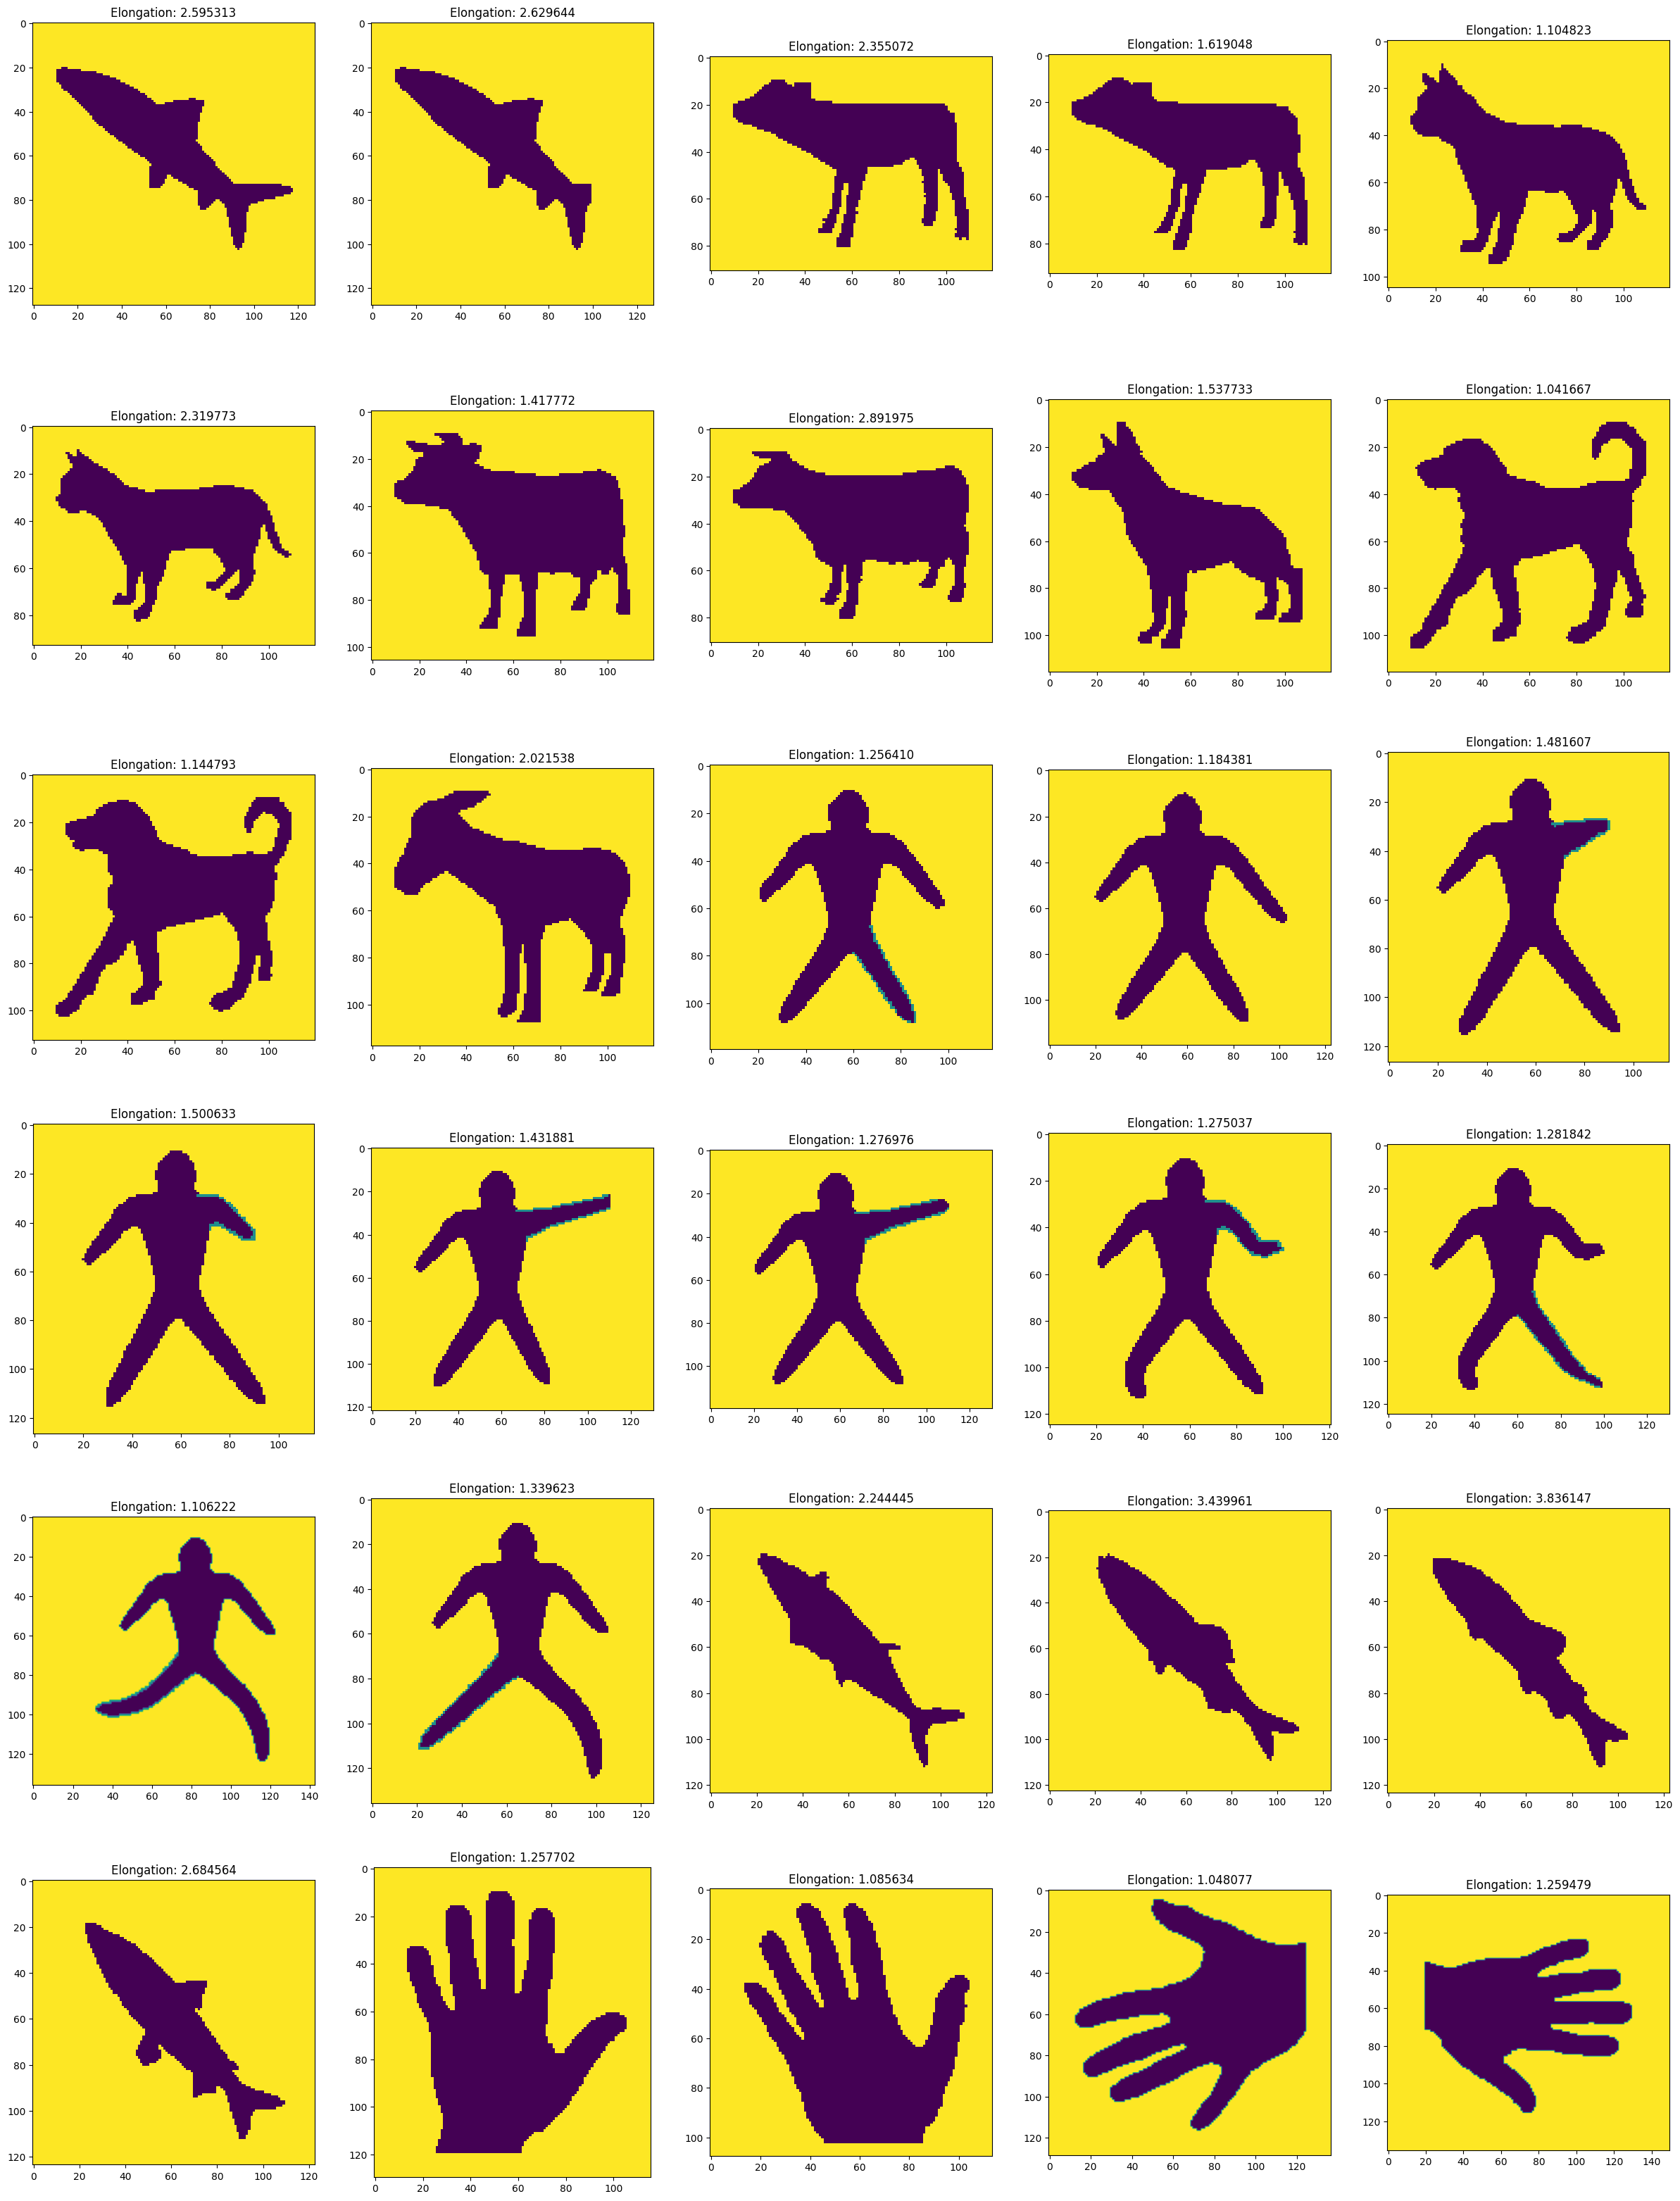

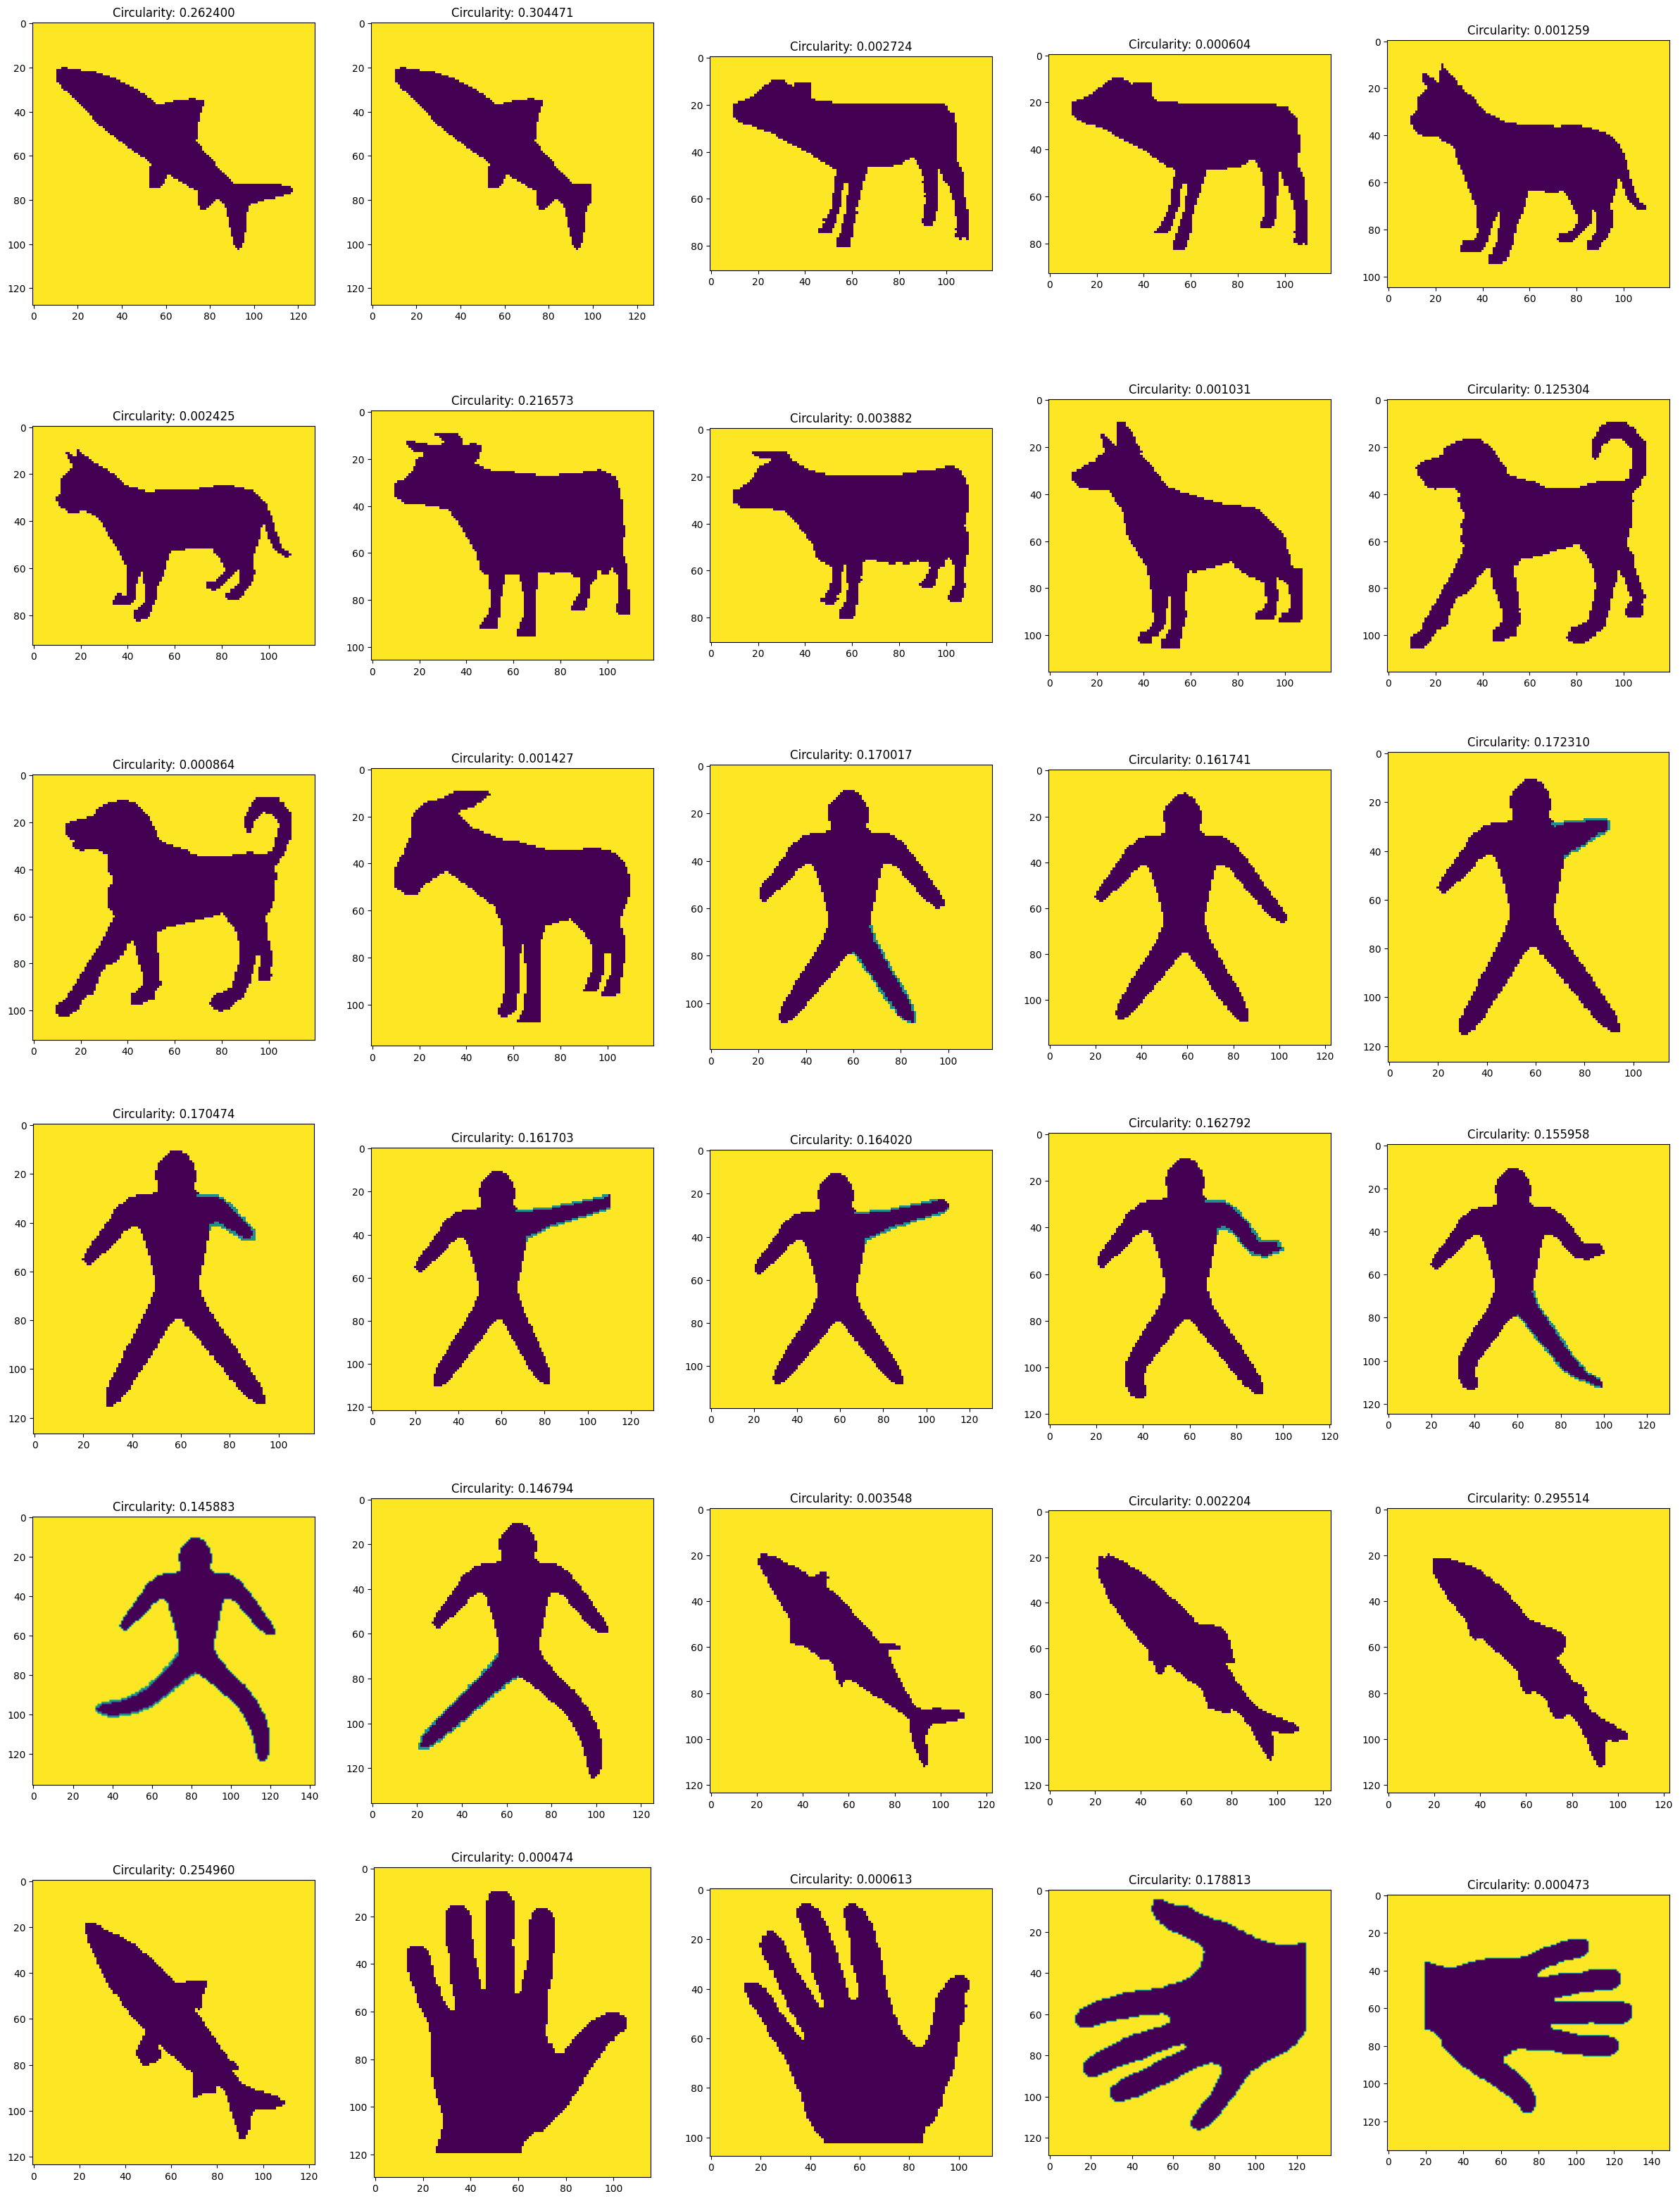

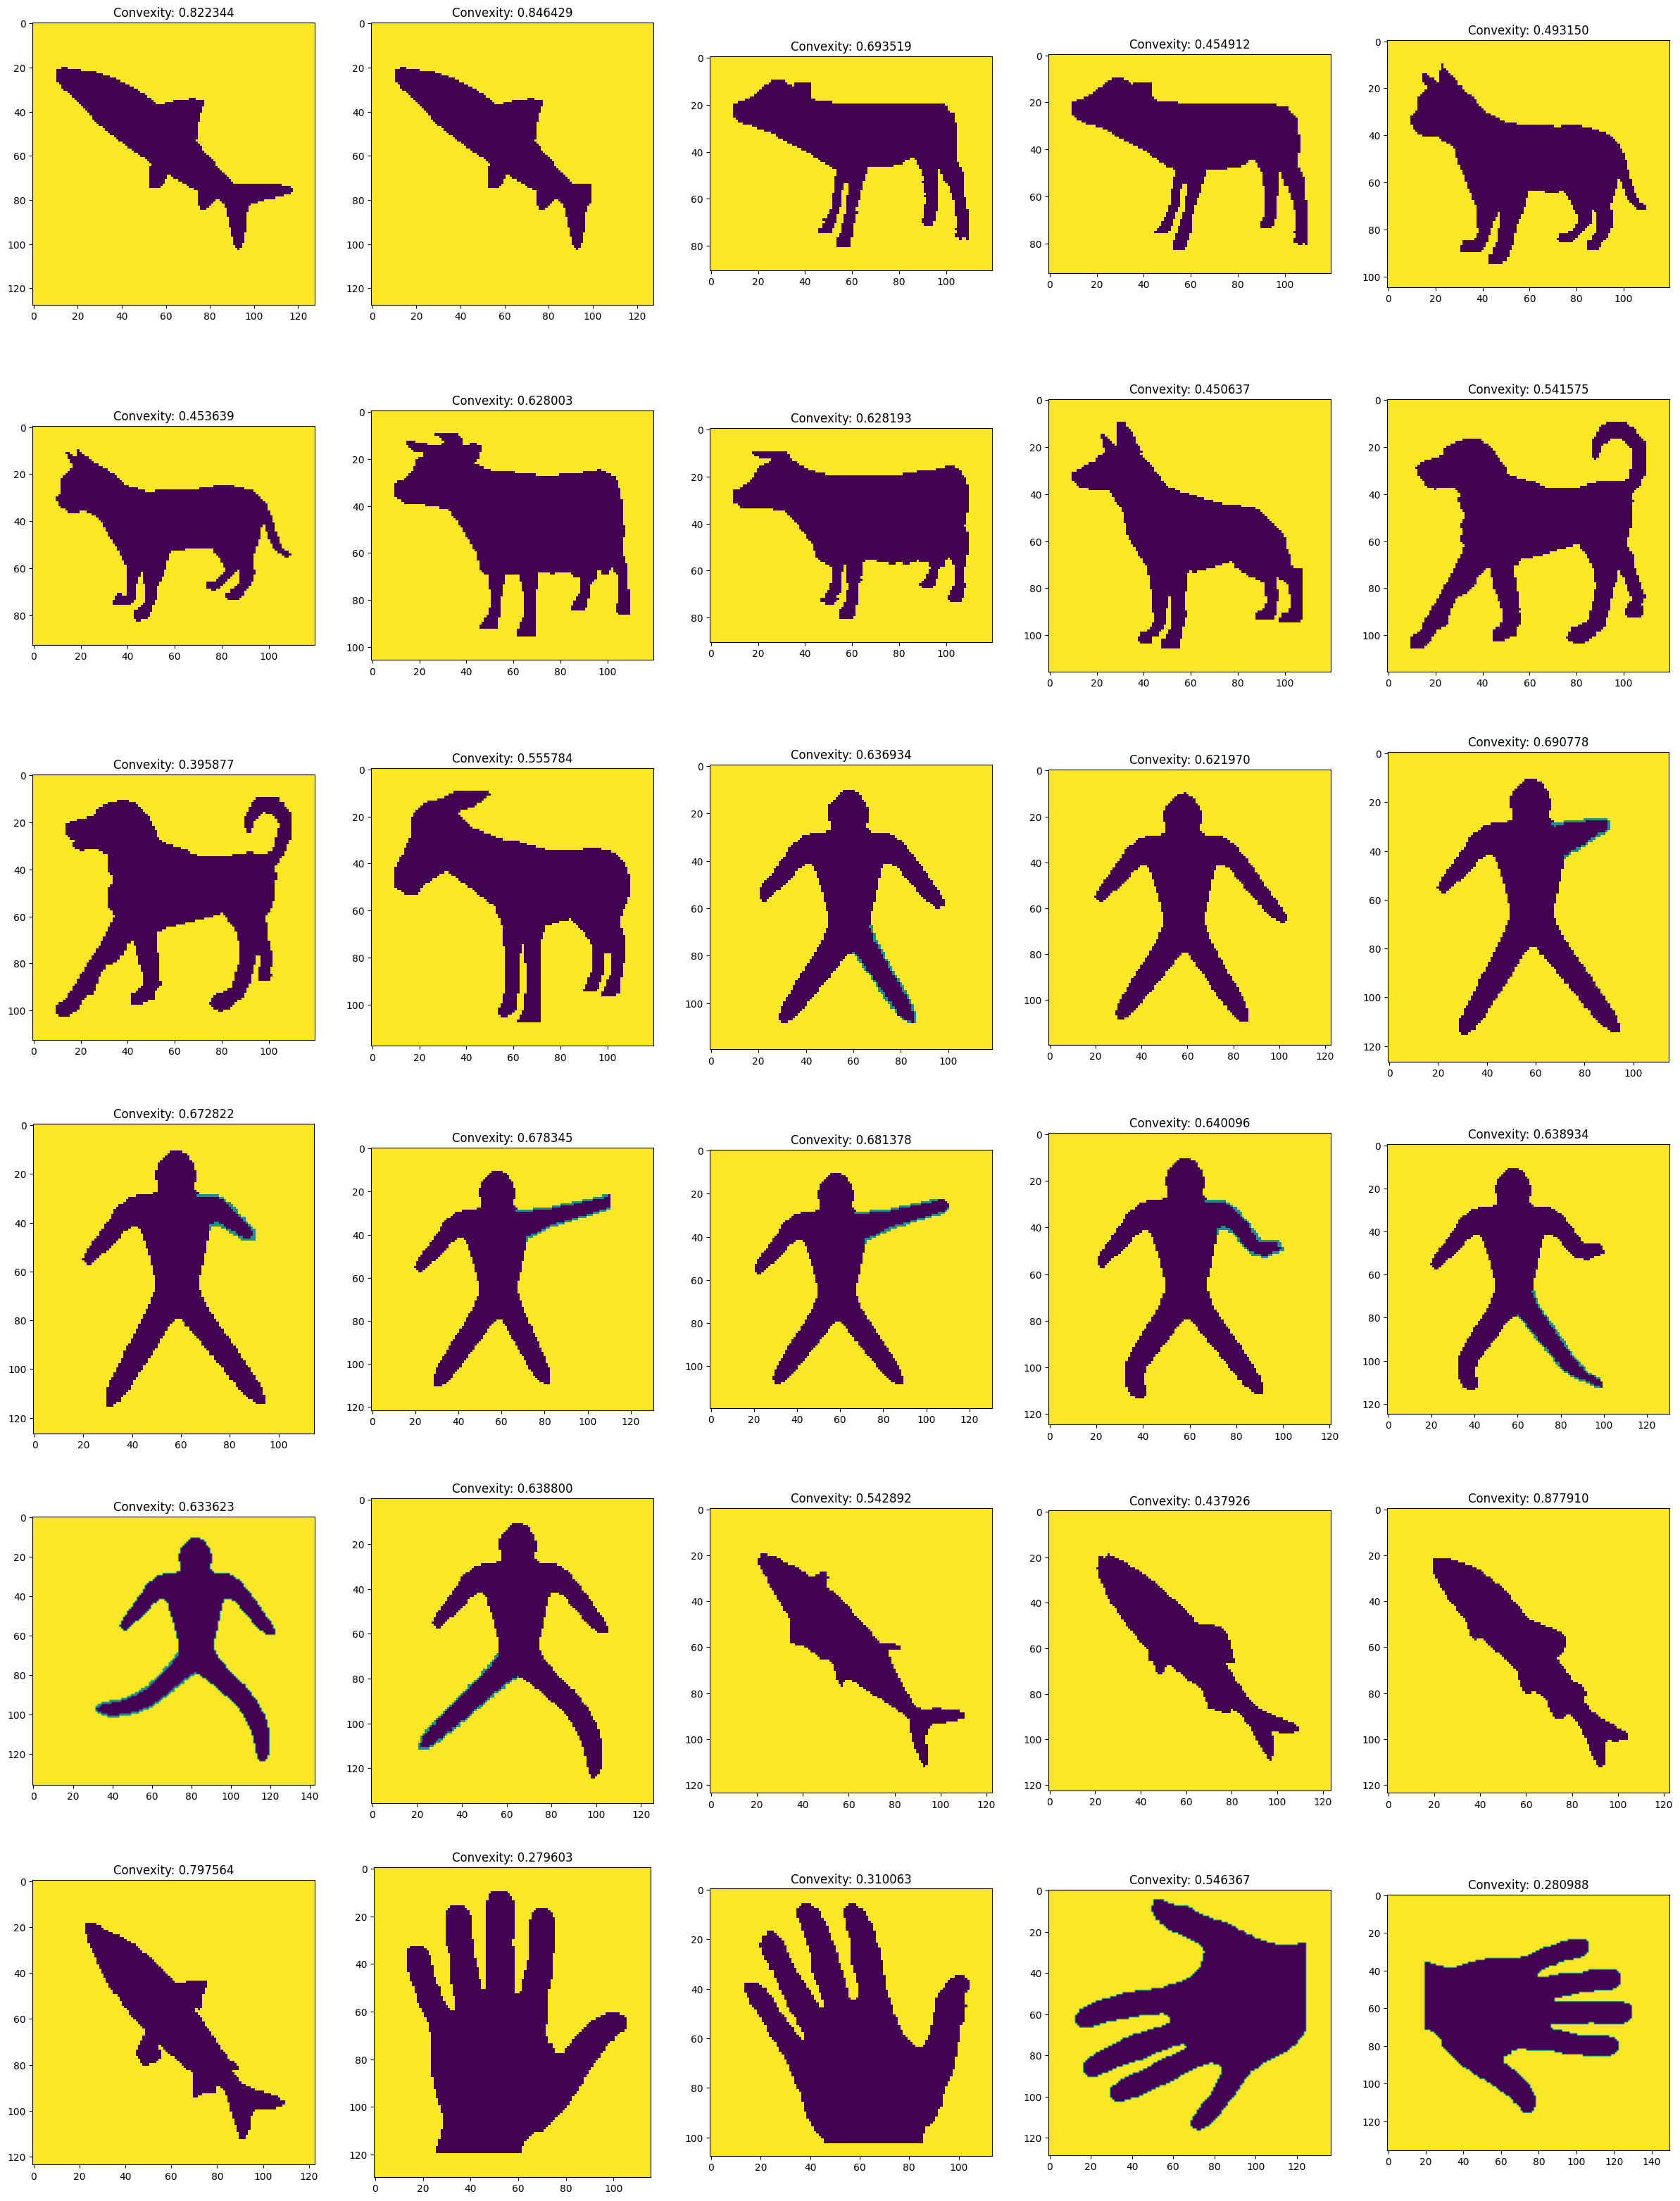

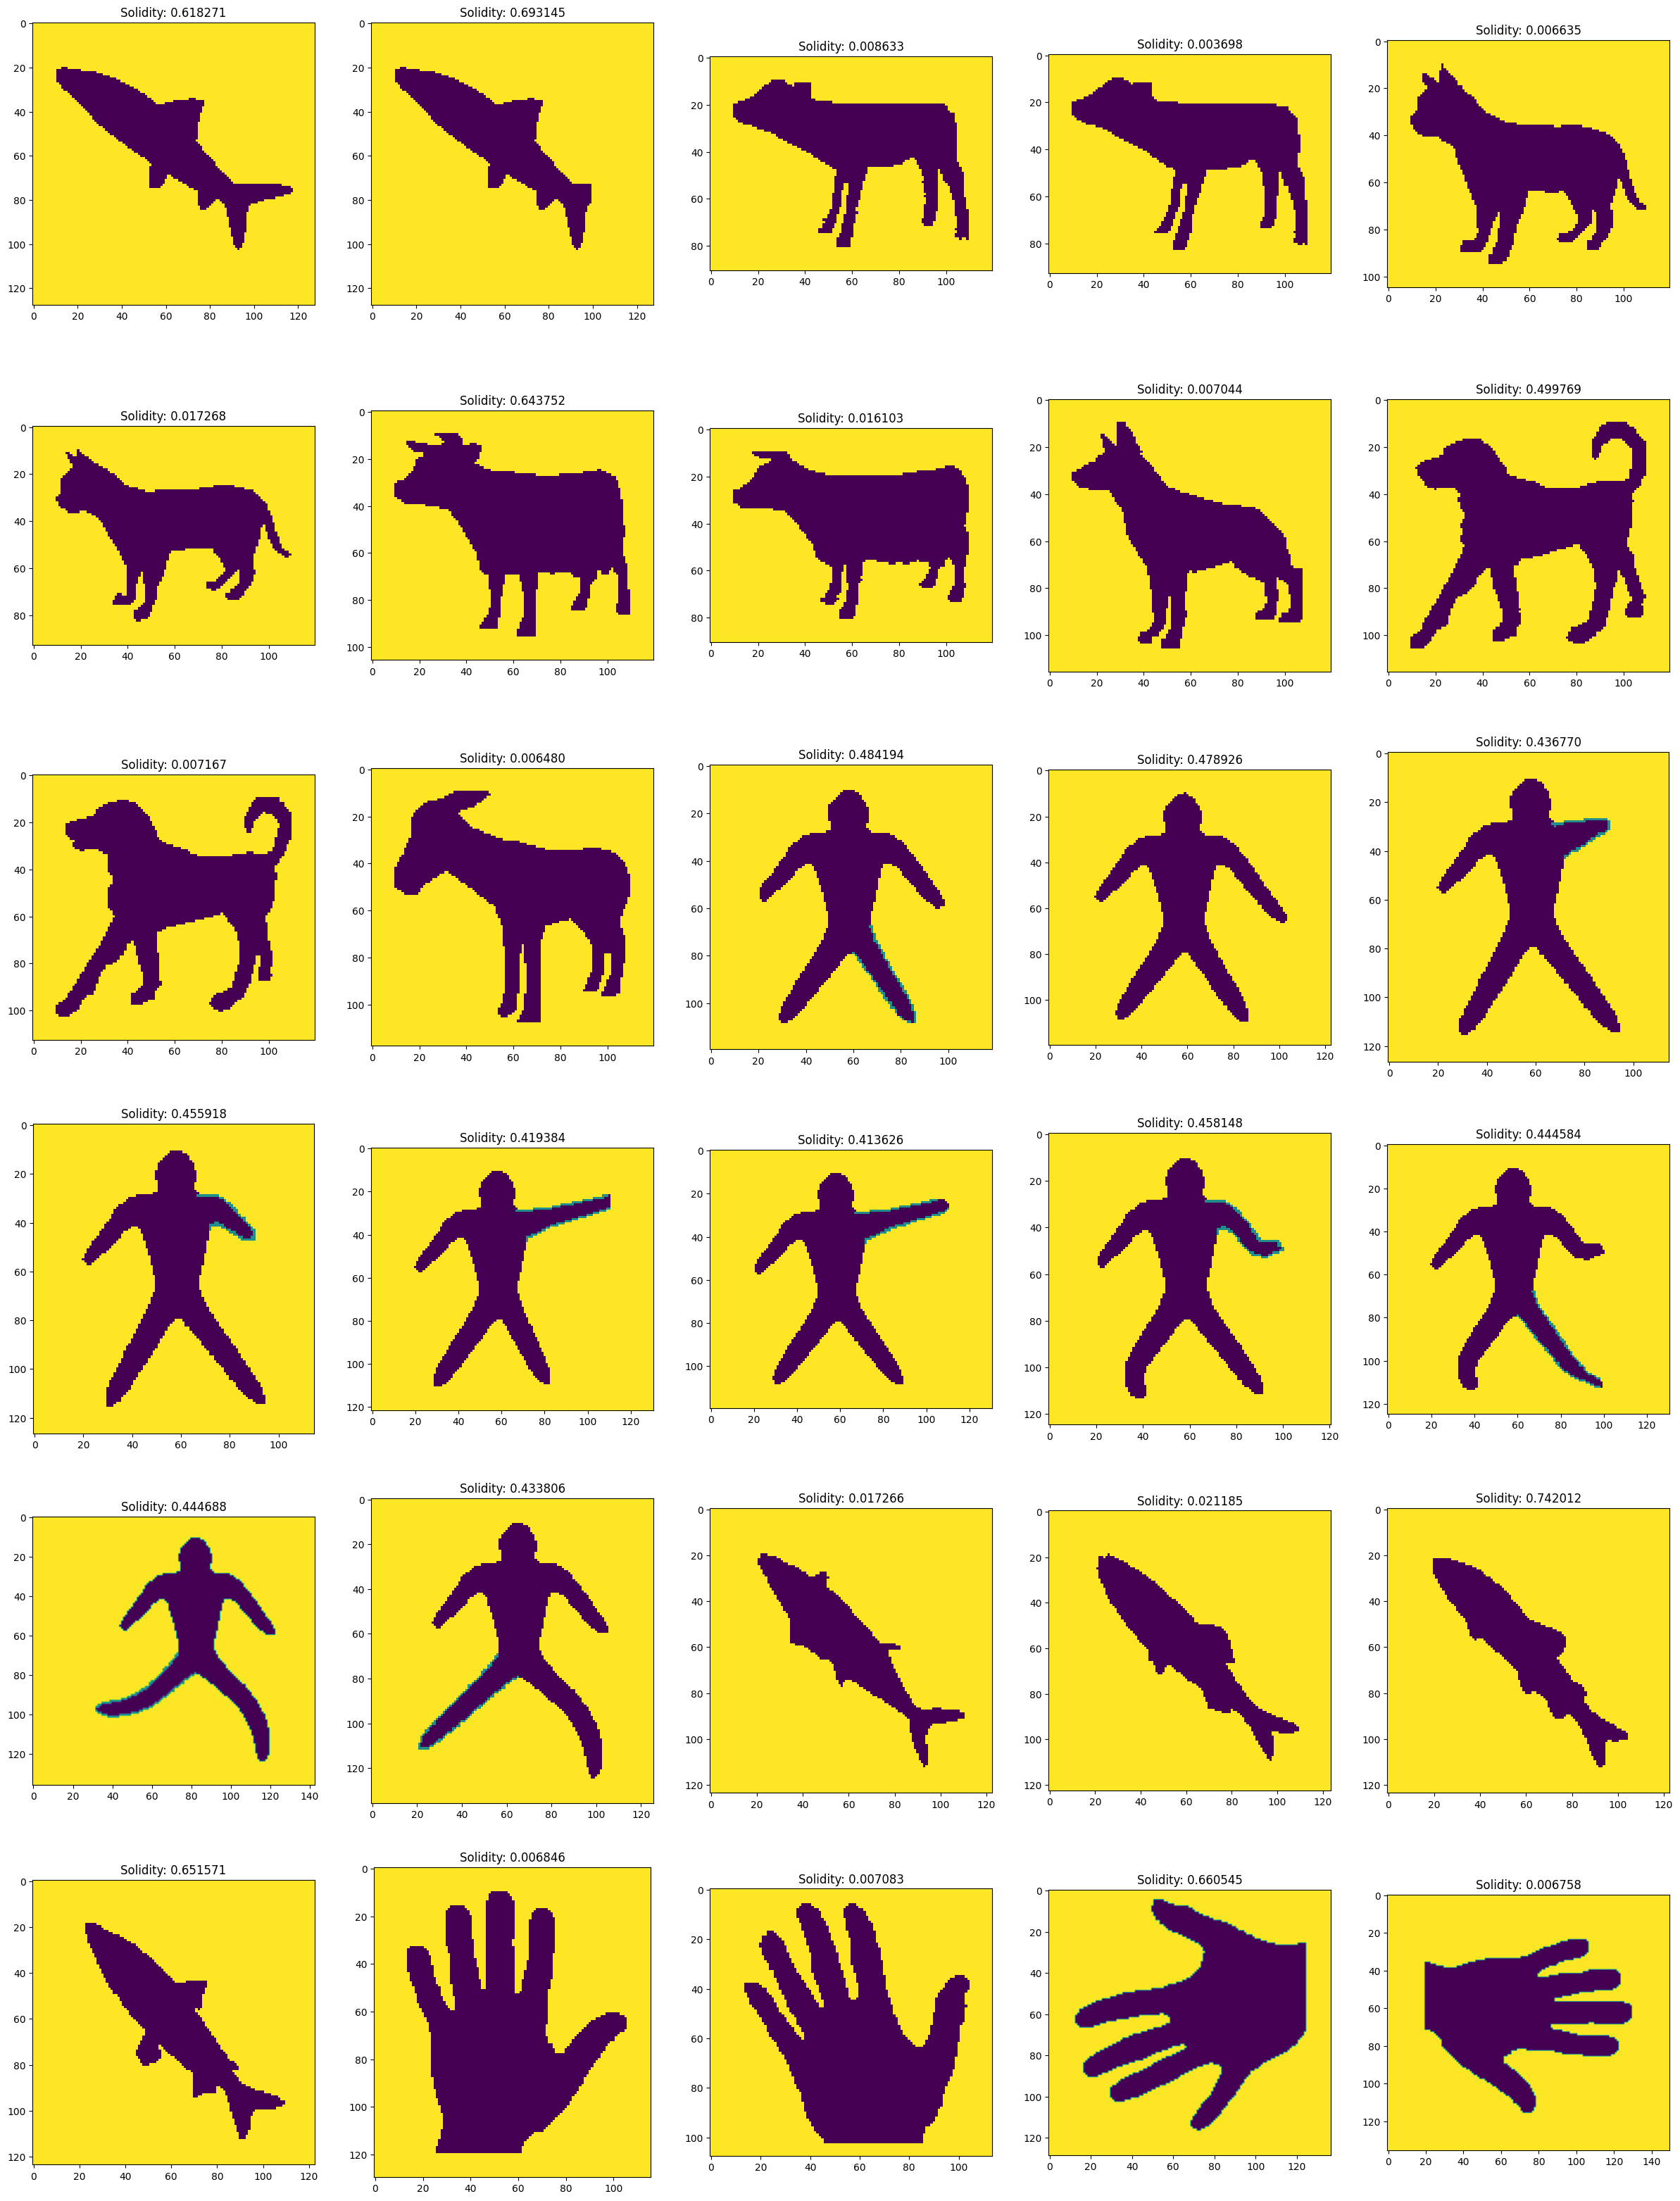

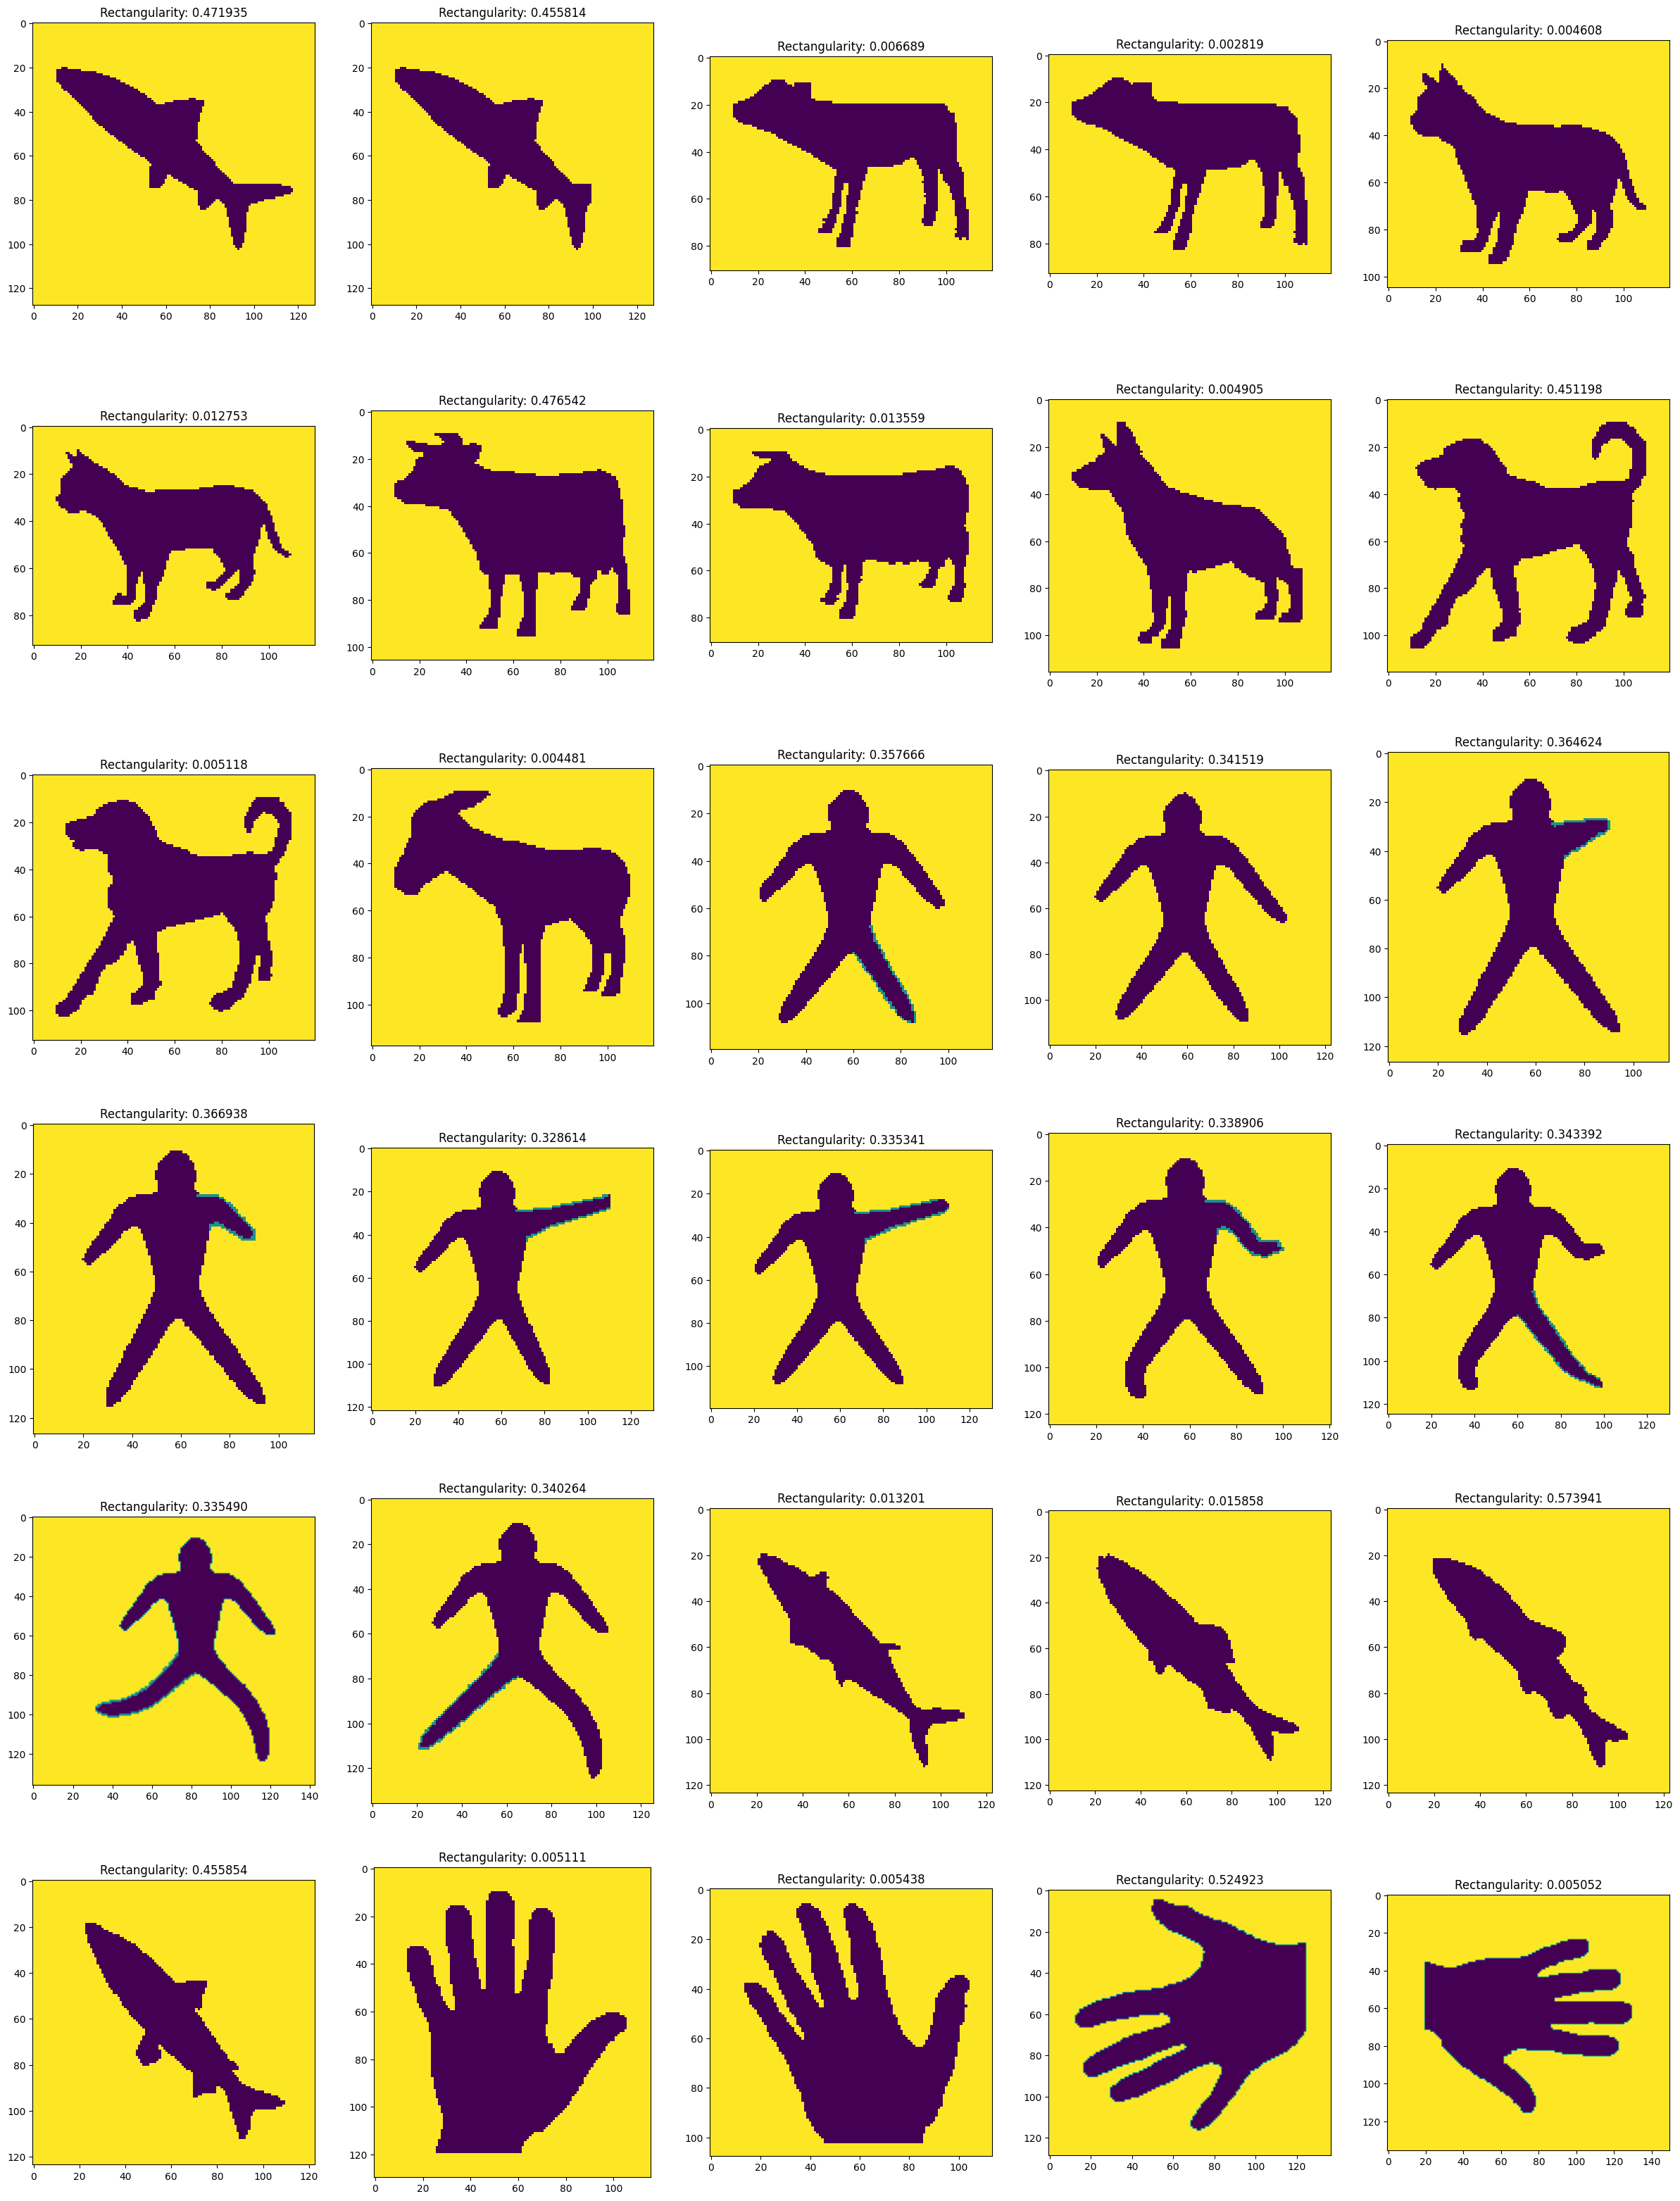

In [11]:

# for df columns

for col in df.columns[1:]:

    #resimleri çiz  metriği yaz ve kaydet

    plt.figure(figsize=(30, 40))

    for i in range(len(os.listdir(image_path))):
        img = mpimg.imread(os.path.join(image_path, os.listdir(image_path)[i]))

        plt.subplot(math.ceil(resimler/5), 5, i + 1)
        plt.imshow(img)

        # altına yaz

        plt.title(f"{col}: {df[col][i]:.6f}")


    plt.savefig(f"feature_{col}.png")


        
